<a href="https://colab.research.google.com/github/rafaelgrecco/DS-ML-Projects/blob/master/Classifica%C3%A7%C3%A3o_de_Roupas_com_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img src="https://raw.githubusercontent.com/rafaelgrecco/Imagens/master/20945602.jpg" height="200px"></p>
<center><a href='https://www.freepik.com/vectors/blue'>Blue vector created by vectorjuice - www.freepik.com</a></center>

#*Classificação de Roupas com Deep Learning*

Acredito que muitos aqui já devem ter feito seu primeiro `Hello, world` em alguma linguagem, para aqueles que não fizeram aqui está o código em python `print('Hello, world')`.

Pensando nesse momento mágico do `Hello, world` que todos tivemos, o dataset que vamos trabalhar hoje é considerado o Hello, world do *Deep Learning* e *Visão Computacional*.

Sem mais mistérios, o dataset é o **Fashion MNIST** que contém 70 mil imagens de 10 classes diferentes. Dessas 70 mil imagens 60 mil são para treino e 10 mil para teste e cada uma dessas imagens tem uma dimensão de 28 x 28 *pixels* e essas estão distribuídas em 10 *labels*: 
<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>

O *dataset* que vamos utilizar foi criado para substituir o MNIST Tradicional uma vez que o mesmo já não representava um real desafio, onde as imagens eram digitos (Imagem do *MNIST Tradicional* abaixo) que CNNs conseguiam atingir mais de 99% de acurácia.

<p align="center"><img src="https://raw.githubusercontent.com/rafaelgrecco/Imagens/master/MNIST.png" height="200px"></p>

##*Obtenção dos dados*

Para obter esse dataset há duas maneiras, uma é direto pelo repositório no github [Link](https://github.com/zalandoresearch/fashion-mnist) e a outra é importar a partir do TensorFlow, neste projeto usarei a partir do TensorFlow com a função `fashion_mnist.load_data()`.

In [ ]:
# bibliotecas necessárias
%tensorflow_version 2.x
import tensorflow as tf 
from tensorflow import keras
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [ ]:
# carregando os dados a partir do TensorFlow
(X_train_ini, Y_train_ini), (X_test_ini, Y_test_ini) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# colocando os labels em Português
class_names = ['Camisetas/Top', 'Calça', 'Suéter',
               'Vestidos','Casaco', 'Sandálias',
               'Camisas', 'Tênis', 'Bolsa', 'Botas']

##*Exploração dos dados*

Sendo este um dataset padrão e muito utilizado, nossos dados já vem pré processados, no entanto vamos verificar as dimensões dos *arrays* que temos até o momento.

Vamos ver uma imagem convertida em *array* também, vale ressaltar que em nosso *array* o maior valor é $255$ que corresponde ao branco e o menor é $0$ que corresponde ao preto absoluto.

In [ ]:
# verificando as dimensões 
print('X_train', X_train_ini.shape)
print('Y_train', Y_train_ini.shape)
print('X_test', X_test_ini.shape)
print('Y_test', Y_test_ini.shape)

# visualizando uma imagem em array
print('\nImagem em Array:\n', X_train_ini[0][:7][:7])

X_train (60000, 28, 28)
Y_train (60000,)
X_test (10000, 28, 28)
Y_test (10000,)

Imagem em Array:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]]


Aqui estamos visualizando as 7 primeiras linhas e as 7 primeiras colunas da primeira imagem do *dataset*

In [ ]:
# verificando se os valores dos datasets de treino e teste estão balaceados
print('Treino:')
np.unique(Y_train_ini, return_counts=True)

Treino:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [ ]:
print('Teste:')
np.unique(Y_test_ini, return_counts=True)

Teste:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

Para encerrar essa etapa, vamos visualizar algumas imagens com seus respectivos labels.

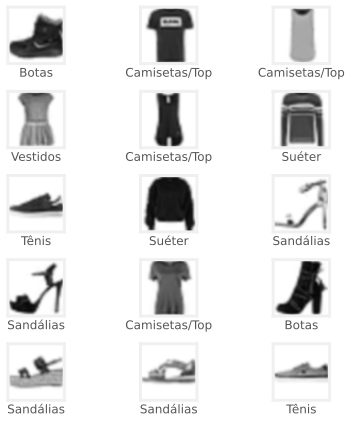

In [ ]:
plt.figure(figsize=(6,6))

for i in range(15):
    plt.subplot(5, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_ini[i], cmap=plt.  cm.binary, interpolation='bicubic')
    plt.xlabel(class_names[Y_train_ini[i]])
plt.tight_layout()

##*Pré-Processamento das imagens*
Temos que realizar essa etapa antes de treinar a rede neural e a mesma será divida em algumas etapas:
* Normalizar os Pixels
* Redimensionar as imagens 
* One-Hot Encoding

###*Normalização de Pixels*

Nesta etapa vamos fazer os valores de cada *pixel*, que como já foi mencionado está no intervalo $[0,255]$, ficarem no intervalo $[0,1]$, essencialmente queremos transformar os valores dos *pixels* para o tipo `float`. Para fazer isso basta dividir todos os *pixels* pelo maior valor possível, nesse caso $255.0$

In [ ]:
# definindo uma função lambda para normalizar os pixels e transformar em float32
Fn = lambda x: (x / 255.0).astype('float32')

# agora é só aplicar no dataset de treino e teste
X_train = Fn(X_train_ini)
X_test = Fn(X_test_ini)

###*Redimensionalização das imagens*
O **TensorFlow** espera uma lista com 4 dimensões e se voltarmos no começo vamos ver que os datasets de treino e teste estão nos retornando uma lista com 3 dimensões. A lista que o TensorFlow espera é da forma $(m, a, l, c)$, onde 
* $m=$ *Número de imagens* 
* $a=$ *Altura*
* $l=$ *Largura*
* $c=$ *Número de Canais*

Como as imagens estão em **escala cinza**, o número de canais é $1$

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) 
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# verificando como vai ficar
print('Treino: {} '.format(X_train.shape))
print('\nTeste: {}'.format(X_test.shape))

Treino: (60000, 28, 28, 1) 

Teste: (10000, 28, 28, 1)


Como podemos verificar, agora nos foi retornada uma lista com 4 dimensões na forma $(m, a, l, c)$

###*One-Hot Encoding*
Nossos *labels* estão no que chamamos de *Integer encoding* é possível utilizar dessa forma, no entanto pode fazer com que o modelo de *deep learning* entenda que a uma relação entre as ordens dos *labels*. 

Por exemplo, `Camisetas/Top` tem *label* igual a $0$, `Calça` tem *label* igual a $1$ isso pode levar o modelo a pensar que esses valores possuem uma relação e com isso, prejudicando o desempenho. Caso nossos `labels` tivessem uma relação ordinal não precisaríamos dessa etapa.

Caso queira mais informações sobre sobre **One-hot Encoding**, [Leia este artigo](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).

Podemos realizar esse processo de forma muito simples e rápida utilizando o *Keras*.


In [ ]:
# aplicando ao dataset de treino
Y_train = keras.utils.to_categorical(Y_train_ini)

# agora para o dataset de teste
Y_test = keras.utils.to_categorical(Y_test_ini)

##*Rede Neural Convolucional*
Existem muitas arquiteturas de CNN. Para este projeto vamos usar uma simplificação da VGGNet, implementada pelo renomado cientista de dados Adrian Rosebroke, no entanto com algumas modificações.

In [ ]:
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))  
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

###*Compilando e Treinando a rede neural*

Geralmente para a `loss function` usamos a `sparse_categorical_crossentropy`, no entanto como alteramos nossos *labels* de **integer Encoding** para **One-hot Encoding** não podemos usa-la, logo devido a isso vamos usar a `categorical_crossentropy` como `loss function`

Na etapa de treinamento em `validation_split` pedimos para resevar 30% do nosso dataset para validação


In [ ]:
# compilando
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# treinando
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 16s 6ms/step - loss: 0.7071 - accuracy: 0.7652 - val_loss: 0.3133 - val_accuracy: 0.8896
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3530 - accuracy: 0.8744 - val_loss: 0.2845 - val_accuracy: 0.8974
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3121 - accuracy: 0.8866 - val_loss: 0.2484 - val_accuracy: 0.9118
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2702 - accuracy: 0.9014 - val_loss: 0.2454 - val_accuracy: 0.9142
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2495 - accuracy: 0.9083 - val_loss: 0.2402 - val_accuracy: 0.9170
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2408 - accuracy: 0.9148 - val_loss: 0.2619 - val_accuracy: 0.9163
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2229 - accuracy: 0.9189 - val_loss: 0.2056 - val_accuracy

##*Avaliando o Modelo*
Pode-se notar que obtemos 95% de acurácia nos dados de treino e 93% nos dados de validação.

In [ ]:
Y_hat = model.predict(X_test)
clas_y_hat = np.argmax(Y_hat, axis=1)
print(classification_report(Y_test_ini, clas_y_hat, target_names=class_names))

               precision    recall  f1-score   support

Camisetas/Top       0.86      0.89      0.88      1000
        Calça       0.99      0.99      0.99      1000
       Suéter       0.93      0.89      0.91      1000
     Vestidos       0.93      0.93      0.93      1000
       Casaco       0.89      0.91      0.90      1000
    Sandálias       0.99      0.99      0.99      1000
      Camisas       0.79      0.79      0.79      1000
        Tênis       0.98      0.95      0.97      1000
        Bolsa       0.99      0.99      0.99      1000
        Botas       0.95      0.98      0.97      1000

     accuracy                           0.93     10000
    macro avg       0.93      0.93      0.93     10000
 weighted avg       0.93      0.93      0.93     10000



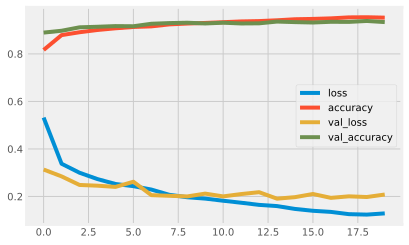

In [ ]:
pd.DataFrame(history.history).plot()
plt.show()

Podemos notar um pequeno *overfitting*, no entanto como vimos anteriormente isso não prejudicou muito a acurácia do nosso modelo.